In [6]:
import pandas as pd;
import numpy as np;
from IPython.display import display

In [3]:
from sklearn.datasets import load_wine

In [13]:
wine_data = load_wine();
data_frame = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
data_frame['target']= wine_data.target;
display(data_frame);

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [16]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
X = wine_data.data;
y = wine_data.target;

In [11]:
feature_names = wine_data.feature_names
target_names = wine_data.target_names
print(feature_names)
print(target_names);

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

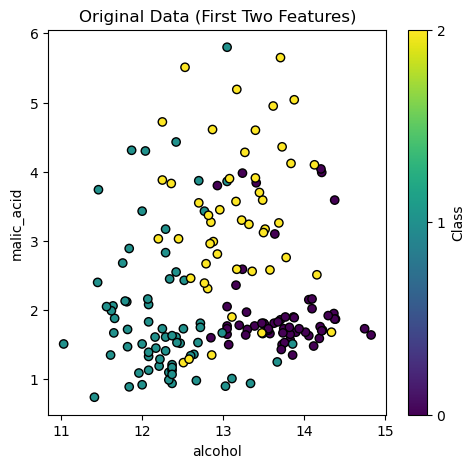

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Original Data (First Two Features)')
plt.colorbar(ticks=[0, 1, 2], label='Class')

In [23]:
lda = LDA(n_components=2);
X_train_lda = lda.fit_transform(X_train,y_train);
X_test_lda = lda.transform(X_test)

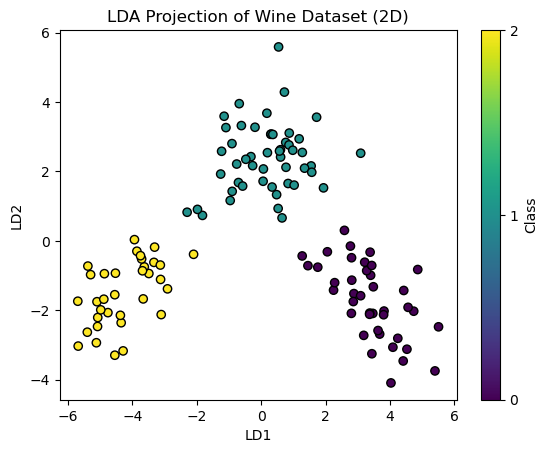

In [24]:
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Projection of Wine Dataset (2D)')
plt.colorbar(ticks=[0, 1, 2], label='Class')
plt.show()

In [27]:
lda_classifier = LDA()
lda_classifier.fit(X_train, y_train)
y_pred = lda_classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 1.0
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [30]:
from sklearn.linear_model import LogisticRegression;
classifier = LogisticRegression();
classifier.fit(X_train_lda, y_train)

LogisticRegression()

In [31]:
y_pred = classifier.predict(X_test_lda)
print(y_pred)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 0 2 0 1 1 2 0 1 0 0 2]
